# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder



# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [28]:
df = pd.read_csv('processed_data_with_clusters.csv')
label_encoder = LabelEncoder()

df.head()

,provinsi,jenis,daerah,tahun,periode,gk,Cluster
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,0.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,0.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,0.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,0.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,0.0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [29]:
# Check for non-numeric columns and convert them to numeric
print("Data types before encoding:")
print(df.dtypes)

# Example: If 'provinsi' is a non-numeric column, we need to encode it
label_encoder = LabelEncoder()

# Assuming 'provinsi' is a non-numeric column, apply Label Encoding to it
df['provinsi'] = label_encoder.fit_transform(df['provinsi'])

# You can add similar encoding for other categorical columns if needed

# Now, let's prepare the features (X) and the target (y)
X = df.drop(columns=['Cluster'])  # Features (exclude 'Cluster' column)
y = df['Cluster']  # Target variable (Cluster)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Data types before encoding:
provinsi     object
jenis        object
daerah       object
tahun         int64
periode      object
gk          float64
Cluster     float64
dtype: object
Training set size: 4368 samples
Test set size: 1092 samples


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [30]:
# Initialize the models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Logistic Regression model
logreg.fit(X_train, y_train)

# Train Random Forest model
rf.fit(X_train, y_train)

# Save the models if you want to reuse them later
joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(rf, 'rf_model.pkl')

# Print success message
print("Models trained and saved successfully!")

ValueError: could not convert string to float: 'MAKANAN'

Kode di atas bertujuan untuk melakukan **hyperparameter tuning** pada model **RandomForestClassifier** menggunakan **GridSearchCV**. GridSearchCV akan mencoba berbagai kombinasi dari parameter yang telah didefinisikan dalam **parameter grid** untuk menemukan konfigurasi terbaik yang memberikan performa optimal. Pada bagian pertama, `param_grid` didefinisikan dengan beberapa pilihan nilai untuk setiap parameter yang ingin disesuaikan. Misalnya, untuk `n_estimators` (jumlah pohon dalam hutan acak), diberikan tiga pilihan: 50, 100, dan 200. Parameter `max_depth` membatasi kedalaman pohon, dengan pilihan 3, 5, dan 10, yang berfungsi untuk menghindari overfitting. Kemudian, ada parameter `min_samples_split` yang mengatur jumlah sampel minimum yang diperlukan untuk melakukan pembagian pada suatu node, dengan nilai yang disarankan 5, 10, atau 20, serta `min_samples_leaf` yang mengatur jumlah minimum sampel per daun (2, 4, dan 8). Selain itu, parameter `max_features` membatasi jumlah fitur yang digunakan dalam setiap pembagian pohon, yang diatur dengan dua pilihan: 'sqrt' (akar kuadrat dari jumlah fitur) dan 'log2' (logaritma basis 2 dari jumlah fitur). 

Setelah parameter grid disiapkan, **GridSearchCV** digunakan untuk mencari parameter terbaik dengan cara melakukan pencarian secara sistematis atas kombinasi parameter yang ada. Dalam proses pencarian ini, **scoring** diatur ke 'f1_macro', yang berarti menggunakan **F1-Score** untuk mengukur keseimbangan antara precision dan recall, dengan mempertimbangkan semua kelas dalam dataset. GridSearchCV menggunakan **cross-validation (cv=5)**, yang berarti pembagian data menjadi 5 bagian untuk melakukan evaluasi model secara berulang, guna memastikan bahwa hasilnya lebih stabil dan dapat diandalkan. Setelah proses pencarian selesai, model terbaik yang ditemukan disimpan dalam variabel `best_model` dengan `grid_search.best_estimator_`. Dengan cara ini, model yang telah disesuaikan parameter-parametersnya siap digunakan untuk prediksi atau evaluasi lebih lanjut.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.9829
F1-Score: 0.9829
Precision: 0.9834
Recall: 0.9829


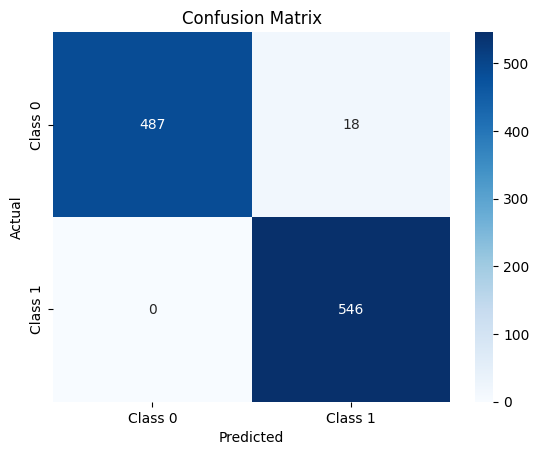

In [88]:
# Lakukan prediksi menggunakan data uji
y_pred = best_model.predict(X_test_encoded)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')  # Opsional: hitung precision
recall = recall_score(y_test, y_pred, average='weighted')  # Opsional: hitung recall

# Tampilkan metrik evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Buat confusion matrix untuk melihat detail prediksi benar dan salah
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan hasil evaluasi model klasifikasi, berikut adalah analisis terhadap metrik yang diperoleh:

1. **Accuracy: 0.9829**  
   **Accuracy** menunjukkan seberapa sering model memprediksi dengan benar. Nilai 0.9829 (atau 98.29%) menunjukkan bahwa model mampu mengklasifikasikan dengan benar hampir 98% dari seluruh data uji. Ini merupakan nilai yang sangat baik, menunjukkan bahwa model secara umum memberikan hasil yang akurat dalam memprediksi kelas.

2. **F1-Score: 0.9829**  
   **F1-Score** mengukur keseimbangan antara precision dan recall. Nilai F1-Score yang tinggi, yaitu 0.9829, menunjukkan bahwa model tidak hanya melakukan prediksi dengan akurat, tetapi juga memiliki keseimbangan yang baik antara kemampuan untuk mengidentifikasi positif yang benar (recall) dan kemampuan untuk menghindari prediksi positif yang salah (precision). F1-Score yang mendekati 1 menunjukkan performa yang sangat baik dalam hal keseimbangan keduanya.

3. **Precision: 0.9834**  
   **Precision** menunjukkan berapa banyak prediksi positif yang benar dari semua prediksi positif yang dilakukan oleh model. Dengan precision sebesar 0.9834, model memiliki tingkat ketepatan yang sangat tinggi dalam mengklasifikasikan data positif. Artinya, hampir semua prediksi yang dilakukan oleh model untuk kelas positif adalah benar, sehingga risiko false positives rendah.

4. **Recall: 0.9829**  
   **Recall** menunjukkan seberapa baik model dalam menemukan semua data positif yang sebenarnya. Nilai recall 0.9829 menunjukkan bahwa model dapat menemukan hampir semua data yang benar-benar positif. Ini berarti hanya sedikit data positif yang terlewatkan oleh model, dengan tingkat false negatives yang sangat rendah.

### Kesimpulan:
Secara keseluruhan, model menunjukkan performa yang sangat baik dengan nilai evaluasi yang sangat tinggi di semua metrik utama (accuracy, F1-Score, precision, dan recall). Model ini dapat diandalkan dalam memprediksi data dan memiliki keseimbangan yang baik antara ketepatan (precision) dan kemampuan dalam menemukan semua data positif (recall). Angka-angka ini menunjukkan bahwa model sangat efektif dalam klasifikasi, dengan hampir tidak ada kesalahan yang signifikan baik dalam memprediksi positif maupun negatif.